In [1]:
from IPython.display import display
from IPython.core.display import HTML

# Machine Learning - Aufgabenblatt 2

## Datensatz

Wir arbeiten in dieser Aufgabenblatt mit dem `fish.csv` Datensatz.

Es handelt sich um **157 Fische** die am Finland’s Lake Laengelmaevesi gefangen wurden und folgende **7 Features** wurden erhoben:

| Feature | Descriptiopn                                                                  |
|---------|-------------------------------------------------------------------------------|
| Species | Fischspezies                                                                   |
| Weight  | Gewicht vom Fisch (in Gramm)                                                  |
| Length1 | Länge des Fisches von der Nase bis zum Schwanzansatz (in Zentimetern)         |
| Length2 | Länge des Fisches von der Nase bis zur Schwanzkerbe (in Zentimetern)          |
| Length3 | Länge des Fisches von der Nase bis zum Schwanzende (in Zentimetern)           |
| Height  | Maximale Höhe des Fisches (in Zentimetern)                                    |
| Width   | Maximale Breite des Fisches (in Zentimetern)                                  |

### Weitere Links (Extra)

* Kaggle Competition auf dem Datensatz: https://www.kaggle.com/aungpyaeap/fish-market 
* Beschreibung: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.4/imlsug/imlsug_ugappdatasets_sect009.htm


## Ziel

Wir wollen in diesem Aufgabenblatt ein `lineares Modell` trainieren, dass als `Output` das Gewicht eines Fisches (`Weight`) anhand verschiedener `Features` vorhersagen kann.

![Ziel dieses Aufgabenblattes](./img/goal.png)


## Setup

Das Einlesen der Daten wurde hier bereits gemacht.

In [2]:
import pandas as pd

df = pd.read_csv('data/fish.csv')

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Aufgabe 1 - Train, Validation, Test Split

In Aufgabe 1 teilen wir die Daten in
* `Features` und `Zielvariable` (Aufgabe 1.1)
* ein `Test-Set` und `Data-Set` (Aufgabe 1.2)
* und anschliessend das `Data-Set` in ein `Train-Set` und `Validation-Set` (Aufgabe 1.5).

### Aufgabe 1.1 - Aufteilen in Features und Zielvariable

Zuerst müssen wir unser Datensatz in `Features` und `Zielvariable` aufteilen.
Wir möchten das Gewicht eines Fisches vorhersagen können, also ist `Weight` unsere Zielvariable.
Und wir behalten vorerst alle restlichen Features.

1. Spalten Sie den Datensatz `df` in die Features `X` (alle Features/Spalten ausser `Weight`, mittels `df.drop`) und die Zielvariable `y` (hier `Weight`, mittels Basic-Indexing) auf.
2. Achten Sie darauf, dass `X` ein `DataFrame` ist und `y` eine `Series` ist. Den Typ einer Variable X können sie in Python mittels `type(X)` herausfinden.
3. Wieviele Zeilen und wieviele Spalten hat `X`? Nutzen Sie `X.shape`, um die Frage zu beantworten. Was für eine `shape` hat `y`?

#### Hilfreiche Links

* Basic Indexing `df['col_name']`: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#basics
* `drop`: Unter https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html Beispiel "Drop columns".
* `shape`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
* `type`: https://www.programiz.com/python-programming/methods/built-in/type

In [18]:
y = df['Weight']
X = df.drop('Weight', axis=1)

print(y.describe())
print(type(y))

print(X.describe())
print(X.head())

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64
<class 'pandas.core.series.Series'>
          Length1     Length2     Length3      Height       Width
count  159.000000  159.000000  159.000000  159.000000  159.000000
mean    26.247170   28.415723   31.227044    8.970994    4.417486
std      9.996441   10.716328   11.610246    4.286208    1.685804
min      7.500000    8.400000    8.800000    1.728400    1.047600
25%     19.050000   21.000000   23.150000    5.944800    3.385650
50%     25.200000   27.300000   29.400000    7.786000    4.248500
75%     32.700000   35.500000   39.650000   12.365900    5.584500
max     59.000000   63.400000   68.000000   18.957000    8.142000
  Species  Length1  Length2  Length3   Height   Width
0   Bream     23.2     25.4     30.0  11.5200  4.0200
1   Bream     24.0     26.3     31.2  12.4800  4.3056
2   Bream  

### Aufgabe 1.2 - Test-Set, Data-Set - `train_test_split`

Im Theorie Teil haben wir das Aufteilen der Daten in `Train-Set`, `Validation-Set` und `Test-Set` angeschaut.

![Train-Val-Test Split](./img/train-val-test.png)

1. Teilen Sie unsere Daten (Features `X` und Zielvariable `y`) in ein `Test-Set` und `Data-Set` auf mittels `sklearn.model_selection.train_test_split`

Das `Data-Set` teilen wir in Aufgabe 1.5 weiter auf.

#### Hilfreiche Links

* `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
from sklearn.model_selection import train_test_split

print("Vor dem Split...")
print(X.shape, type(X))
print(y.shape, type(y))

X_data, X_test, y_data, y_test = train_test_split(X, y, shuffle=True, random_state=42)

print("Nach dem Split...")
print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data))
print(X_test.shape, type(X_test))
print(y_test.shape, type(y_test))


Vor dem Split...
(159, 6) <class 'pandas.core.frame.DataFrame'>
(159,) <class 'pandas.core.series.Series'>
Nach dem Split...
(119, 6) <class 'pandas.core.frame.DataFrame'>
(119,) <class 'pandas.core.series.Series'>
(40, 6) <class 'pandas.core.frame.DataFrame'>
(40,) <class 'pandas.core.series.Series'>


### Aufgabe 1.3 - Datenanalyse - Schauen wir uns die Daten mal an

Wir können das Feature `Height` als X-Achse und die Zielvariabl `Weight` als Y-Achse in einem Scatter-Plot visualisieren:

1. Erstellen Sie einen Scatter-Plot mit `Height` als X-Achse und `Weight` als Y-Achse mittels `sns.scatterplot`. `seaborn`s `scatterplot` erwartet ein DataFrame für den `data` Parameter. Um die geteilten Daten (`X_data`, `y_data`), wieder in ein DataFrame zu verwandeln, kann man `pd.concat` verwenden: `pd.concat([X_data, y_data], axis=1)`
2. Was können Sie bereits anhand vom Scatter-Plot über die Performanz des linearen Modells sagen?

#### Hilfreiche Links

* `sns.scatterplot`: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
* Was ist ein Scatter-Plot: https://chartio.com/learn/charts/what-is-a-scatter-plot/
* `pd.concat`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
* Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf, bei "Reshaping Data" ist `pd.concat` mit `axis=1` visuell dargestellt.

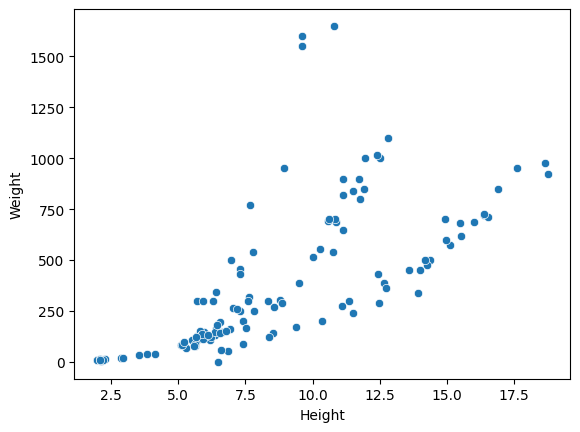

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='Height', y='Weight')
plt.show()

### Aufgabe 1.4 - Pairplot - `sns.pairplot`

Den oben erstellten Scatter-Plot kann man auch systematisch auf alle Features und Zielvariable kombinationen anwenden. Seaborn bietet bereits eine Funktion dafür an.

1. Erstellen Sie den pairplot mittels `sns.pairplot`.
2. Interpretieren Sie den pairplot.

#### Hilfreiche Links

* `sns.pairplot`: https://seaborn.pydata.org/generated/seaborn.pairplot.html
* Video explaining pairplot: https://www.youtube.com/watch?v=uCgvlfIo9fg (zeigt auch weitere Optionen, die wir hier nicht anschauen)

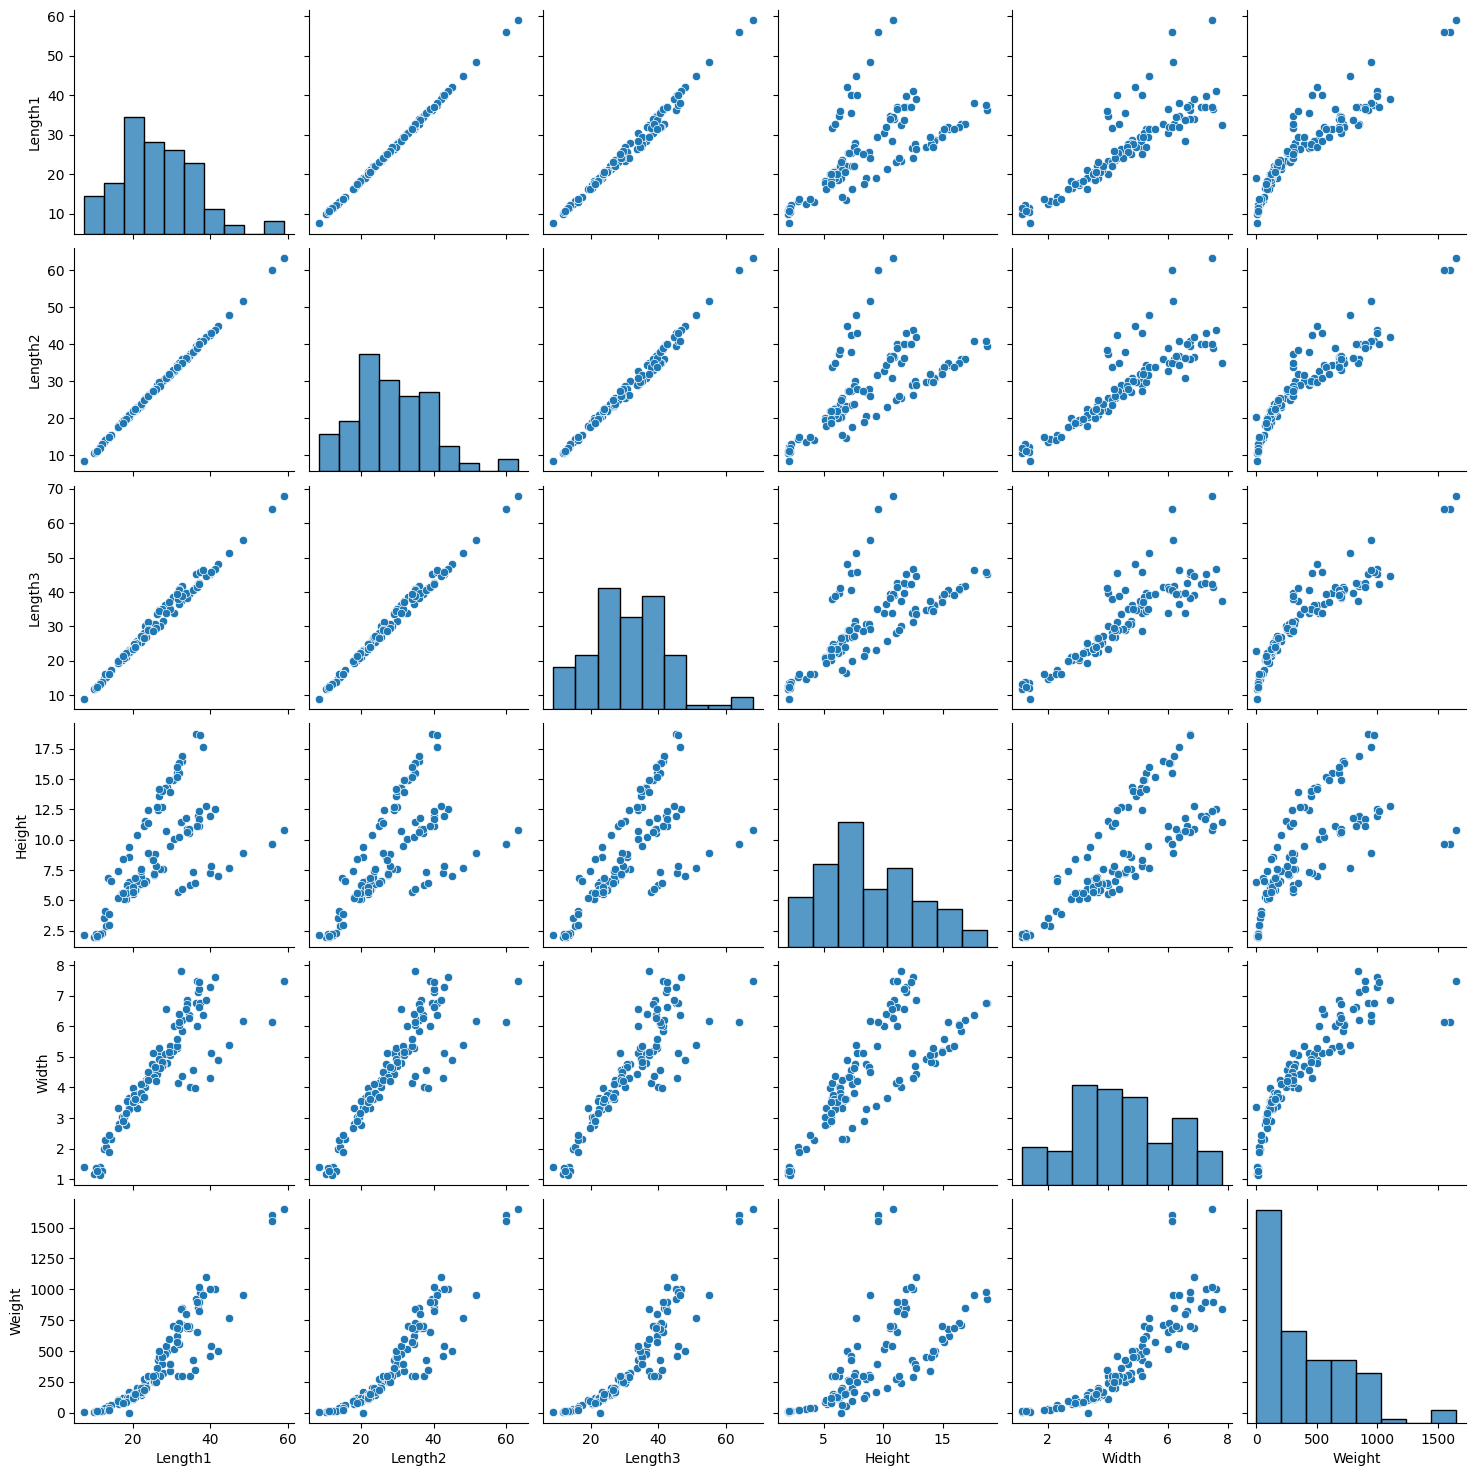

In [26]:
sns.pairplot(data=pd.concat([X_data, y_data], axis=1))

### Aufgabe 1.5 - Train-Set, Validation-Set - `train_test_split`

In Aufgabe 1.2 haben wir die Daten (`df`) in `Data-Set` und `Test-Set` aufgeteilt. Anschliessend haben wir Datenanalyse auf dem `Data-Set` betrieben.

In dieser Aufgabe teilen wir das `Data-Set` weiter in `Train-Set` und `Validation-Set` auf.

![Train-Val-Test Split](./img/train-val-test.png)

1. Teilen Sie das `Data-Set` (`X_data`, `y_data`) in ein `Train-Set` und `Validation-Set` auf mittels `sklearn.model_selection.train_test_split` (Analog zur Aufgabe 1.2).

In [27]:
print('data vor dem split...')
print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data))

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, shuffle=True, random_state=0)

print('data nach dem split...')
print(X_train.shape, type(X_train))
print(X_val.shape, type(X_val))
print(y_train.shape, type(y_train))
print(y_val.shape, type(y_val))


data vor dem split...
(119, 6) <class 'pandas.core.frame.DataFrame'>
(119,) <class 'pandas.core.series.Series'>
data nach dem split...
(89, 6) <class 'pandas.core.frame.DataFrame'>
(30, 6) <class 'pandas.core.frame.DataFrame'>
(89,) <class 'pandas.core.series.Series'>
(30,) <class 'pandas.core.series.Series'>


### Schlusswort Aufgabe 1

In Aufgabe 1 haben wir das ursprüngliche DataFrame `df` in Features `X` und Zielvariable `y` unterteilt, und diese dann weiter in `Train-Set` (`X_train` und `y_train`), `Validation-Set` (`X_val` und `y_val`) sowie `Test-Set` (`X_test` und `y_test`) aufgeteilt.

Wir haben bereit ein wenig Datenanalyse (Aufgabe 1.3 und Aufgabe 1.4) gemacht. 
Beachten Sie, dass wir mit Absicht nicht die `Test-Set` Daten plotteten.
Wir wollen am Schluss ein unbiased estimate über die Performanz von unserem finalen Modell berechnen können.
Als Selbstübung kann man noch weitere seaborn plots ausprobieren: https://seaborn.pydata.org/examples/index.html.
Beispielsweise können Sie das Gewicht der Fische als Boxplot nach Fischspezies darstellen: https://seaborn.pydata.org/examples/grouped_boxplot.html

Das `Train-Set` und `Validation-Set` verwenden wir in Aufgabe 2 und Aufgabe 3, um Modell zu trainieren und ein finales Modell zu finden.

## Linear Regression

### Performanzmass

Als Performanzmass für die Evaluierung des Modells nutzen wir den `RMSE` (`R`oot `M`ean `S`quared `E`rror):

$
\begin{aligned}
RMSE(\vec{y}, \vec{\hat{y}}) = \sqrt{\frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}
\end{aligned}
$

Wobei $\vec{y}$ die echten Fisch-Gewichte sind, und $\vec{\hat{y}}$ unsere Modellvorhersagen sind, und $N$ die Anzahl Datenpunkte ist.

In diesem Aufgabenblatt ist das Performanzmass mit `RMSE` vorgegeben. **In eigenen Projekten muss man zum Beginn des Projektes ein sinnvolles Performanzmass festlegen.**

## Aufgabe 2 - Einfaches Modell

In Aufgabe 2 machen wir ein einfaches Lineares Modell mit **nur einem Feature**, dem Feature `Height`.

Warum nur ein Feature? Weil es den Code einfacher macht und somit einfacher zu verstehen ist - also rein didaktische Gründe.
Warum das Feature `Height`?
Der Pairplot hat gezeigt, dass es einen Zusammenhang zwischen `Height` und `Weight` gibt, wir hätten aber auch `Width` nehmen können.

Wir wollen also ein Modell trainieren, dass anhand der Höhe des Fisches (`Height`), das Gewicht (`Weight`) des Fisches vorhersagt.

### Aufgabe 2.1 - Feature selektieren

1. Selektieren Sie von `X_train` nur das Feature `Height` mittels Basic-Indexing und verwandeln Sie, wenn nötig die Series in ein DataFrame mittels `s.to_frame()`. Benennen Sie die Variable mit dem neue DataFrame `X_train_height`.
2. Untersuchen Sie den type des erstellten DataFrames mittels `type(df)`. Es sollte ein DataFrame sein.
3. Untersuchen Sie die Dimensionen des erstellten DataFrames mittels `df.shape`. Es sollte die Dimensionen (89, 1) haben.

In [28]:
X_train_height = X_train['Height'].to_frame()

print(X_train_height.describe())
print(type(X_train_height))
print(X_train_height.head())
print(X_train_height.shape)


          Height
count  89.000000
mean    9.197964
std     4.012758
min     2.083200
25%     6.216000
50%     7.786000
75%    11.932800
max    18.754200
<class 'pandas.core.frame.DataFrame'>
      Height
148   2.1960
20   15.1285
99    6.4395
49    6.9153
90    5.5225
(89, 1)


### Aufgabe 2.2 - Erstes Lineares Modell - `LinearRegression`, `lr.fit`

Nun wollen wir ein erstes Lineares Modell mit einem Feature auf dem `Train-Set` (`X_train_height`, `y_train`) trainieren (`fit`)
und anschliessend die Performanz unseres Modelles auf unseren `Validation-Set` (`X_val_height`, `y_val`) evaluieren.

1. Erstellen Sie ein Lineares Regressions Modell mittels `LinearRegression` und trainineren Sie es auf dem `Train-Set` (`X_train_height`, `y_train`) mittels `lr.fit`.
2. Verwenden Sie das in 1. trainierte Modell und sagen Sie die Zielvariable auf dem `Validation-Set` (`X_val_height`, `y_train`) voraus mittels `lr.predict`. `X_val_height` müssen Sie noch analog zur Aufgabe 2.1 erstellen. Die Vorhersagen nennen wir `y_val_hat`.
3. Warum braucht `predict` nur die Validierungs-Features (`X_val`) und nicht die Validierungs-Zielvariable (`y_val`) wie z.B. `fit`?
4. Messen Sie den `RMSE`, den wir auf dem `Validation-Set` machen mittels `sklearn.metrics.mean_squared_error(..., squred=False)`, unseren Vorhersagen `y_val_hat` und den tatsächlichen Fisch-Gewichten `y_val`.
5. (Extra) Messen Sie analog zu 4. den `RMSE` auf dem `Train-Set`. Wie Unterscheidet sich diese Betrachtung von 4.? Warum macht es Sinn, diese Werte zu vergleichen?

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_height, y_train)

X_val_heigth = X_val['Height'].to_frame()
lr_predict = lr.predict(X_val_heigth)
print('predit', '\n', lr_predict)

# get RMSE
rmse = mean_squared_error(y_val, lr_predict, squared=False)
print('RMSE:', '\n', rmse)

predit 
 [ 70.94650421 496.56009009 307.2516969  239.39888798 806.19161455
 389.34274303 778.41702508 504.6406141  240.34259881 299.63123192
 859.03942122 312.04102938 -20.82937435 519.62202359 353.76484461
 429.0847655  357.84639396 -13.84591418 593.10170836 209.37708709
 165.88381405 501.92744546 -20.4636864  417.05245237  88.40515462
 473.07348673  32.30154558  -2.83988658 213.98947379 205.21886123]
RMSE: 
 274.20168458425127


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (Extra) Aufgabe 2.3 - Visuallisierung unseres Modells

In Aufgabe 2.2 haben wir unser erstes Modell trainiert.
Wir können dieses nun in den scatter plot von Aufgabe 1.3 plotten.

Aus dem Theoretischen Teil wissen wir, dass das Lineare Modell folgende Form hat:

$
\begin{aligned}
y^{(i)} = \beta_0 + \beta_{1}x^{(i)}_1 + \beta_{2}x^{(i)}_2 + \cdots + \beta_{p}x^{(i)}_p + \varepsilon^{(i)}
\end{aligned}
$

Wenn wir nur von **einem Feature** (wie in Aufgabe 2.2) ausgehen, vereinfacht sich das zu:

$
\begin{aligned}
y^{(i)} = \beta_0 + \beta_{1}x^{(i)}_1
\end{aligned}
$

Wenn wir $\beta_0$ umbennen zu $n$ und $\beta_{1}$ umbennen zu $m$, entspricht dies der Geradengleichung (https://de.wikipedia.org/wiki/Geradengleichung):

$
\begin{aligned}
y = n + m * x
\end{aligned}
$

**Das Modell ist also einfach eine Gerade** im 2-dimensionalen Raum. Sprich wir können das Modell als Linie in den 2-dimensionalen scatter plot von Aufgabe 1.2 zeichnen.

1. Lese den gelernten Y-Achsen-Abschnitt (intercept) aus der Linearen Regression aus mittels `lr.intercept_`. `lr.intercept_` entspricht $\beta_0$.
2. Lese die gelernte Steigung (Slope) aus der Linearen Regression aus mittels `lr.coef_[0]`. `lr.coef_[0]` entspricht $\beta_1$.
3. Zeichnen Sie eine Linie in den scatter plot von Aufgabe 1.2 mittels beispielsweise `plt.plot`.
4. Analysieren Sie den Plot. Ist unser Modell gut?

learned Intercept -137.14173457062367
learned Slope 58.98192709083337


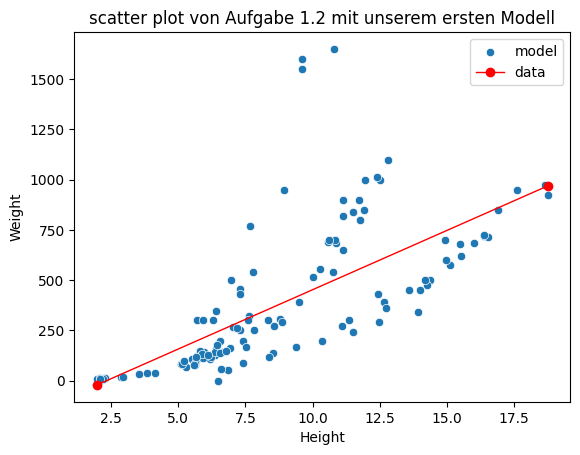

In [38]:
n = lr.intercept_
m = lr.coef_[0]

print("learned Intercept", n)
print("learned Slope", m)

# Auslesen der minimalen Höhe und maximalen Höhe aller Fische
x_min = X_data[['Height']].min()
x_max = X_data[['Height']].max()

# Berechnen der jeweilige Vorhersage unseres Modells (hier manuell)
y_min_hat = n + m * x_min
y_max_hat = n + m * x_max

plt.title("scatter plot von Aufgabe 1.2 mit unserem ersten Modell")
sns.scatterplot(data=pd.concat([X_data[['Height']], y_data], axis=1), x='Height', y='Weight')
# Zeichnen einer Linie der Vorhersagen mittels plt.plot
plt.plot([x_min, x_max], [y_min_hat, y_max_hat], marker='o', linewidth=1, c='red')

plt.legend(['model', 'data'])
plt.show()

### Schlusswort Aufgabe 2

Glückwunsch Sie haben Ihr erstes Machine Learning Modell trainiert. Gehen Sie die Schritte noch einmal in Ruhe durch, wenn Ihnen nicht ganz klar ist, warum wir einzelne Schritte gemacht haben.

In Aufgabe 3 werden wir das Modell verbessern, indem wir **weitere Features** hinzufügen.

## Aufgabe 3 - Feature Engineering und Feature Selection

In Aufgabe 2 haben wir schrittweise ein erstes Modell erstellt, um das Gewicht (`Weight`) eines Fisches vorherzusagen.
Nun geht es darum weitere Features zu betrachten, dabei stellen sich folgende Fragen:

* Welche Features brauchen ein Preprocessing - genannt `Feature Preprocessing` (Aufgabe 3.1)
* Welche Features können wir zusätzlich "erstellen" - genannt `Feature Engineering` (Aufgabe 3.2)
* Welche Features sollen wir überhaupt in Betracht ziehen? - genannt `Feature Selection` (Aufgabe 3.3)

### Aufgabe 3.1 - Feature Preprocessing - `OneHotEncoder`

Wenn wir ein **nicht numerische** Features, wie beispielsweise der Name der Fischspezies (`Species`) haben, können wir das Feature nicht einfach in ein Lineares Regressions Modell geben, da das Modell eine Zahl erwartet.

Bei der Linearen Regression ist das Resultat schliesslich eine gewichtete Summe der Inputs, wie will man einen Text gewichten und dann aufsummieren?
Wenn $x^{(i)}_1$ beispielsweise `"Roach"` wäre, ist nicht klar was das Modell machen müsste:

$
\begin{aligned}
y^{(i)} = \beta_0 + \beta_{1}x^{(i)}_1 + \beta_{2}x^{(i)}_2 + \cdots + \beta_{p}x^{(i)}_p + \varepsilon^{(i)}
\end{aligned}
$

Für diesen Fall, haben wir im Theorieblock bereits vom `One-Hot-Encoding` gehört.
Hier fügen wir einfach für jede Spezienart ein weitere Feature hinzu, wie beispielsweise ein Feature `Roach`. Hat ein Fisch die Spezies `Roach` ist der Wert `1`, ansonsten den Wert `0`.
Hier ist der Ablauf dargestellt:

![One-Hot-Encoding example](./img/one-hot-encoding.png)

1. Nutzen Sie den `OneHotEncoder` von `sklearn.preprocessing`. Zuerst müssen Sie den `OneHotEncoder` auf den `Species` "trainieren" mittels `fit`. Anschliessend können wir die `Species` dann transformieren (das `One-Hot-Encoding` durchführen) mittels `transform`.
2. Analysieren Sie den Typ `type` und die Shape `shape` vom Resultat von Schritt 1.
3. Das Resultat von Schritt 1 müssen wir zuerst in ein `pd.DataFrame` packen mit gleichem index wie unsere Daten `X_train` und den entsprechenden Spaltennamen. Dies kann mittels `pd.DataFrame(..., index=X_train.index, columns=ohe.categories[0])` gemacht werden.
4. Das DataFrame von Schritt 2 können wir dann mit `pd.concat([X_train.drop(columns='Species'), X_train_species], axis=1)` zu unseren Daten anfügen. Nennen Sie das Resultat `X_train_ohe`.

#### Hilfreiche Links
* One-Hot-Encoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
* (Extra) Encoding categorical features: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [ ]:
# TODO

### Aufgabe 3.2 - Alle Features

Das Resultat von Aufgabe 3.1 ist ein DataFrame mit allen Featuren bereit für ein Modell.
In dieser Aufgabe trainieren (`fit`) wir blindlings eine `LinearRegression` auf allen Features.

1. Erstellen Sie ein Lineares Regressions Modell mittels `LinearRegression()` und trainineren Sie es auf dem `Train-Set` (`X_train_ohe`, `y_train`) mittels `lr.fit`.
2. Verwenden Sie das in 1. trainierte Modell und predicten Sie die Zielvariable auf dem `Validation-Set` mittels `lr.predict`. Die Vorhersagen nennen wir `y_val_hat`.
    - Hinweis: Wir müssen `X_val` analog zu `X_train` in  Aufgabe 3.1 noch zu `X_val_ohe` preprocessen.

In [ ]:
# TODO

### Aufgabe 3.3 - Cross-Validation - `sklearn.model_selection.cross_val_predict`

In Aufgabe 1 haben wir das `Data-Set` einmal in ein `Train-Set` und `Validation-Set` aufgeteil und in Aufgabe 2 ein Modell auf dem `Train-Set` trainiert (`fit`) und danach auf dem `Validation-Set` validiert (`predict`).

Die somit gemessene Performanz auf dem `Validation-Set` ist stark abhängig von diesem einen `Validation-Set`.
Und wiederholen wir die Schritte mit einer anderen zufälligen Aufteilung in `Train-Set` und `Validation-Set`, kann die gemessene Perfomanz schwanken.

Wir können die tatsächliche Performanz unseres Modelles stabiler berechnen mit der im Theorie Teil vorgestellten `K-Fold-Cross-Validation`.

Dazu teilen wir das `Data-Set` systematisch in `k` (also beispielsweise 5) verschiedene `Train-Set` und `Validation-Set` auf,
wobei ein `Validation-Set` immer $\frac{1}{5}$ aller Datenpunkte beinhaltet und jeder Datenpunkt **genau einmal** in einem diesen 5 `Validation-Set`s vorkommt.

![K-Fold-Cross-Validation](./img/k-fold-cross-validation.png)

Anschliessend wird immer ein neues Modell auf einem `Train-Set` trainiert und die Werte auf dem `Validation-Set` vorhergesagt und gespeichert.
Nachdem wir das für alle 5 `Train-Set`s und `Validation-Set`s dies gemacht haben, haben wir für **jeden Datenpunkt im `Data-Set` eine Vorhersage** gemacht und gespeichert. 
Wir mussten dafür aber 5 Modelle trainieren.

1. Man kann das oben beschriebene Verfahren mit `for` Schleifen selbst implementieren, aber `sklearn` bietet bereits eine vorgefertigte Lösung. Wenden Sie `sklearn.model_selection.cross_val_predict` auf die `LinearRegression` und dem `Data-Set` (`X_data`, `y_data`) an.
    - `X_data` analog zu Aufgabe 3.1 preprocessen.
2. Was genau ist der `cv` Parameter? Experimentieren Sie.
3. (Extra) Es gibt weitere Funktionen wie `cross_val_score` (https://scikit-learn.org/stable/modules/classes.html#model-validation). Was machen diese?
4. (Extra) Implementieren Sie die Cross-Validation mit `for` Schleifen selbst

In [ ]:
# TODO

### Aufgabe 3.4 - Feature Engineering

Es ist oft wichtig aus den bestehenden Features für das zugrundeliegende Problem sinnvolle Features zu "basteln" (`engineeren`). Oft fliesst bei diesem Schritt Expertenwissen der jeweiligen Domäne ein.
Für das bestimmen vom Gewicht eines Fisches, ist beispielsweise das `Volumnen` nützlich.

1. Approximieren Sie das Volumen eines Fisches auf dem `Data-Set` mit den Featuren `Height`, `Width` und `Length3` (alle multiplizieren).
    - Nenne Sie das neue Feature `approx_Volume`
2. Vergleichen Sie alle Features ohne `approx_Volume` (Aufgabe 3.3) und alle Features mit `approx_Volume` mittels `cross_val_predict`.

In [ ]:
# TODO

### (Extra) Aufgabe 3.5 - Feature Selection

Im Fall vom Fisch Datensatz funktioniert es erstaunlich gut, einfach blindlings alle Features zu nehmen.
Dies liegt daran, dass wir für die Anzahl Features okay viele Datenpunkte haben. Wir haben 89 Datenpunkte im `Train-Set` für 6 Features (12 Features nach dem One-Hot-Encoding). Daher kommt es zu keinem `Overfitting`.

In [ ]:
X_train.shape

Wir können trotzdem versuchen die Anzahl Features zu reduzieren. Dies kann auch trotz Performanzverlust vom Modell sinnvoll sein.
Beispielsweise müsste ein hypothetischer Benutzer weniger Daten in einem Formular eingeben, wenn man das Modell über ein Benutzerinterface zugängig macht.

In dieser Aufgabe versuchen wir die `4` wichtigsten Features mittels `sklearn.feature_selection.RFE` zu bestimmen.

1. Versuechen Sie manuell `4` Features auszuwählen und evaluieren Sie ein Modell mittels `cross_val_predict`.
2. Erstellen Sie ein `sklearn.feature_selection.RFE` mit einer `LinearRegression()` und `n_features_to_select=4` als Parameter. `fit`en Sie `RFE` mit dem `Data-Set` (`X_data_ohe_engineered`, `y_data`).
    - Bemerkung: `RFE` erwartet skalierte Features, skalieren Sie daher die Features zuerst mittels `sklearn.preprocessing.StandardScaler`.
3. Evaluieren Sie die Performanz gefundenen Features `rfe.get_support()` mittels `Cross Validation`.
4. Das Ergebniss aus Schritt 3. ist ein biased estimate der echten Performanz, warum?
5. Wiederholen Sie Schritt 3 mit `sklearn.feature_selection.SelectKBest`.
6. Wiederholen Sie Schritt 3 mit `sklearn.feature_selection.SelectFromModel`.

In [ ]:
# TODO

##### (Extra) Weitere Schritte
* Feature selection: https://scikit-learn.org/stable/modules/feature_selection.html

### Schlusswort Aufgabe 3

Wir haben angefangen das Problem mit Linearen Modellen zu lösen. In der Praxis würde man noch deutlich mehr probieren, beispeislweise:

* Systematisches `Feature Engineering` mit `PolynomialFeatures`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
* Abgeschwächte `Feature Selection` mittels `Regularisierung` auf diesen erstellten Features, wie `Lasso` oder `Ridge`.
* Intelligentes `Feature Engineering` indem man Wissen von Fachpersonen (hier z.B. Fischverkäufer) in neue Features einfliessen lässt.

Für eine erste Übung haben wir aber schon viel getan. In der nächsten Übung bestimmen wir die Performanz unseres finalen Projektes mittels dem `Test-Set`.
In der Praxis würden wir dies am Ende des Projektes tun, damit wir ein unbiased Estimate über die Performanz unseres Modells haben.
Dieses Estimate ist vielleicht für die Kommunikation mit den Vorgesetzten, möglichen Kunden entscheidend.

## Aufgabe 4 - Test Set

In Aufgabe 1.2 haben wir das `Test-Set` (`X_test`, `y_test`) erstellt und beiseite gelegt. Nun wollen wir das gefundene Modell auf diesem `Test-Set` evaluieren.

1. Nehmen Sie ein Modell aus einer vorherigen Aufgabe als finales Modell.
2. Wenden Sie dieses Modell auf dem `Test-Set` (`X_test`, `y_test`) an. `X_test` muss allenfalls noch entsprechend verarbeitet werden (`One Hot Encoding`, etc.)
3. Bestimmen Sie den `RMSE` auf den Vorhersagen von Schritt 2 und `y_test`.

In [ ]:
# TODO

## Schlusswort Aufgabenblatt 2

Wir haben Konzepte kennen gelernt, die wir immer wieder antreffen werden, wie das Aufteilen in `Train-Set`, `Validation-Set` und `Test-Set`, wie auch das trainieren (`fit`) eines sklearn Modelles (`LinearRegression`).

### (Extra) Pipeline

Vielleicht ist Ihnen aufgefallen, dass wir oft die gleiche Schritte, wie `One-Hot-Encoding`, auf allen drei Datensätze (`Train-Set`, `Validation-Set`, `Test-Set`) anwenden mussten.
Um das handlicher zu machen, gibt es im sklearn das Konzept der `Pipeline`.

Für interessierte kann ich empfehlen sich darin einzulesen: https://scikit-learn.org/stable/modules/compose.html
Man kann diese Aufgaben auch mit Pipelines lösen.

sklearn Pipelines werden wir ansonsten im `Machine Learning Lab` wieder antreffen.